In [1]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"
# Hay que ejecutarlo cada vez que quiera probar esto
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Clonamos de mi repositorio de git los scripts necesarios para ejecutar esto
!git clone https://github.com/urtzi98/pytorch_objectDetectTrack.git
!pip install filterpy

Cloning into 'pytorch_objectDetectTrack'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 27 (delta 0), reused 27 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.
     |████████████████████████████████| 184kB 4.9MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-cp36-none-any.whl size=110451 sha256=e8f913e9c87d477a377d060ffc1190908cf8be253f064a4e3ea6789aac3b2efc
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dd/e92392c3f38a41371602d99fc77d6c1d42aadbf0c6afccdd02
Successfully built filterpy


In [3]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2
%cd pytorch_objectDetectTrack/

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"
/content/pytorch_objectDetectTrack


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Video size 1920 1080
En el frame  16 Encontramos los siguientes objectsID
295.0


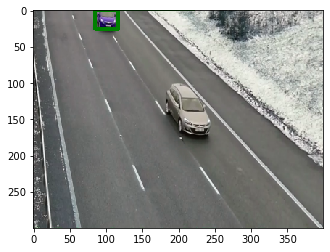

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


En el frame  20 Encontramos los siguientes objectsID
296.0


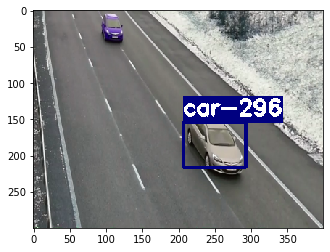

295.0


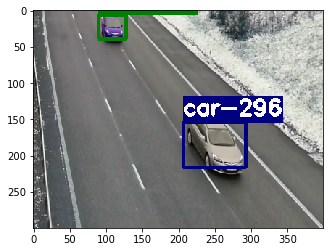

En el frame  24 Encontramos los siguientes objectsID
295.0


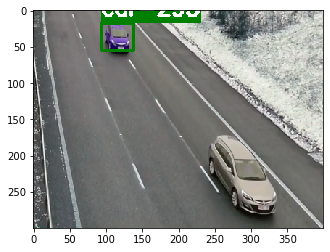

En el frame  28 Encontramos los siguientes objectsID
295.0


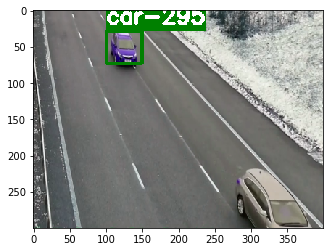

En el frame  44 Encontramos los siguientes objectsID
En el frame  144 Encontramos los siguientes objectsID
En el frame  148 Encontramos los siguientes objectsID
En el frame  152 Encontramos los siguientes objectsID
En el frame  156 Encontramos los siguientes objectsID
En el frame  160 Encontramos los siguientes objectsID
299.0


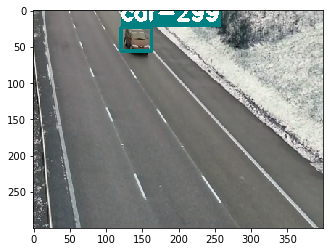

En el frame  164 Encontramos los siguientes objectsID
299.0


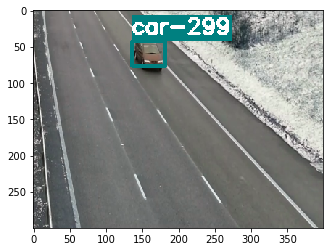

En el frame  168 Encontramos los siguientes objectsID
299.0


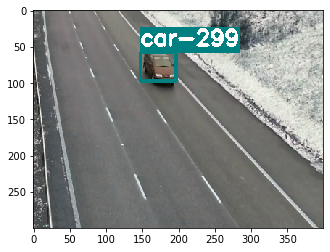

En el frame  172 Encontramos los siguientes objectsID
299.0


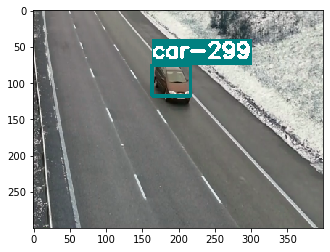

En el frame  176 Encontramos los siguientes objectsID
En el frame  180 Encontramos los siguientes objectsID
En el frame  184 Encontramos los siguientes objectsID
En el frame  192 Encontramos los siguientes objectsID
En el frame  196 Encontramos los siguientes objectsID
En el frame  200 Encontramos los siguientes objectsID
En el frame  204 Encontramos los siguientes objectsID
304.0


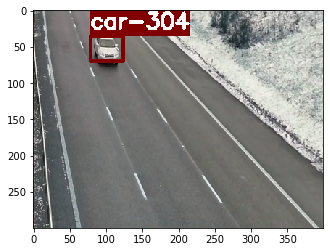

En el frame  208 Encontramos los siguientes objectsID
304.0


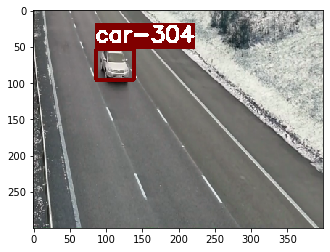

En el frame  212 Encontramos los siguientes objectsID
304.0


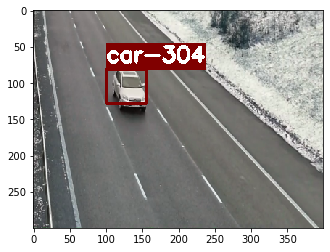

En el frame  216 Encontramos los siguientes objectsID
304.0


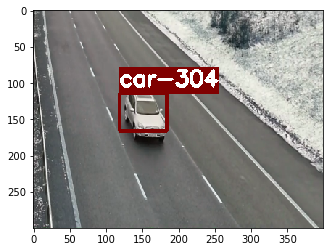

En el frame  220 Encontramos los siguientes objectsID
373 frames 0.029053877250119126 s/frame
Total time to process de vide is  10.837096214294434


In [29]:
#principal program
from models import *
from utils import *

import os, sys, time, datetime, random
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable

from PIL import Image

# load weights and set defaults
config_path='/content/gdrive/My Drive/darknet/cfg/yolov3-bdd100k.cfg'
weights_path='/content/gdrive/My Drive/darknet/backup/3clasesAnchorsSubd16/yolov3-bdd100k_6000.weights'
class_path='/content/gdrive/My Drive/darknet/cfg/bdd100k-3clases.names'
img_size=416
conf_thres=0.23
nms_thres=0.3

# load model and put into eval mode
model = Darknet(config_path, img_size=img_size)
model.load_weights(weights_path)
model.cuda()
model.eval()

classes = utils.load_classes(class_path)
Tensor = torch.cuda.FloatTensor

def detect_image(img):
    # scale and pad image
    ratio = min(img_size/img.size[0], img_size/img.size[1])
    imw = round(img.size[0] * ratio)
    imh = round(img.size[1] * ratio)
    img_transforms = transforms.Compose([ transforms.Resize((imh, imw)),
         transforms.Pad((max(int((imh-imw)/2),0), max(int((imw-imh)/2),0), max(int((imh-imw)/2),0), max(int((imw-imh)/2),0)),
                        (128,128,128)),
         transforms.ToTensor(),
         ])
    # convert image to Tensor
    image_tensor = img_transforms(img).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input_img = Variable(image_tensor.type(Tensor))
    # run inference on the model and get detections
    with torch.no_grad():
        detections = model(input_img)
        detections = utils.non_max_suppression(detections, 80, conf_thres, nms_thres)
    return detections[0]

videopath = '/content/gdrive/My Drive/darknet/data/road_orig.mp4'

%matplotlib inline
from matplotlib import pyplot as plt
import cv2
from sort import *
colors=[(255,0,0),(0,255,0),(0,0,255),(255,0,255),(128,0,0),(0,128,0),(0,0,128),(128,0,128),(128,128,0),(0,128,128)]

vid = cv2.VideoCapture(videopath)
mot_tracker = Sort() 

#cv2.namedWindow('Stream',cv2.WINDOW_NORMAL)
#cv2.resizeWindow('Stream', (800,600))

fourcc = cv2.VideoWriter_fourcc(*'XVID')
ret,frame=vid.read()
vw = frame.shape[1]
vh = frame.shape[0]
print ("Video size", vw,vh)
dim = (800,600)
outvideo = cv2.VideoWriter(videopath.replace(".mp4", "-result.mp4"),fourcc,20.0,(400,300))

frames = 0
starttime = time.time()
#obj_id=0
frame_threshold = 4
while(True):
    ret, frame = vid.read()
    if not ret:
        break
    if (np.mod(frames,frame_threshold) == 0 and frames != 8 and frames !=12):
        frame = cv2.resize(frame,dim,interpolation = cv2.INTER_AREA) ##hacemos un resize para quitar resolucion
        frame = frame[300:601,400:801] #con esto recortamos la imagen
        #frames += 1
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pilimg = Image.fromarray(frame)
        detections = detect_image(pilimg)

        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        img = np.array(pilimg)
        pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
        pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
        unpad_h = img_size - pad_y
        unpad_w = img_size - pad_x
        if detections is not None:
            tracked_objects = mot_tracker.update(detections.cpu())

            unique_labels = detections[:, -1].cpu().unique()
            n_cls_preds = len(unique_labels)
            print("En el frame ",frames,"Encontramos los siguientes objectsID")
            #print(unique_labels)
            for x1, y1, x2, y2, obj_id, cls_pred in tracked_objects:
                box_h = int(((y2 - y1) / unpad_h) * img.shape[0])
                box_w = int(((x2 - x1) / unpad_w) * img.shape[1])
                y1 = int(((y1 - pad_y // 2) / unpad_h) * img.shape[0])
                x1 = int(((x1 - pad_x // 2) / unpad_w) * img.shape[1])
                color = colors[int(obj_id) % len(colors)]
                cls = classes[int(cls_pred)]
                cv2.rectangle(frame, (x1, y1), (x1+box_w, y1+box_h), color, 4)
                cv2.rectangle(frame, (x1, y1-35), (x1+len(cls)*19+80, y1), color, -1)
                cv2.putText(frame, cls + "-" + str(int(obj_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)
                print(obj_id)
                #cv2.imshow('Stream', frame)
                plt.imshow(frame)
                plt.show()
        outvideo.write(frame)
        ch = 0xFF & cv2.waitKey(1)
        if ch == 27:
            break
    frames += 1
totaltime = time.time()-starttime
print(frames, "frames", totaltime/frames, "s/frame")
print("Total time to process de vide is ",totaltime)
cv2.destroyAllWindows()
outvideo.release()

In [0]:
!ls

config	models.py    PyTorch_Object_Detection.ipynb  README.md	utils
images	__pycache__  PyTorch_Object_Tracking.ipynb   sort.py


In [0]:
vid = cv2.VideoCapture(videopath)
frame_count = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
fps = vid.get(cv2.CAP_PROP_FPS) #frames per second
duration = frame_count/fps
print(str(fps))
print(duration)
vid.release()

30.0
12.466666666666667


In [0]:
from google.colab import files
files.download('road-res.mp4')